# Project: Investigate a TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected TMDB movies dataset for my project. I will focus my interest on a specific genre, I wish to explore movies that labeled Comedy. Since some movies have multiple labels in genres column, I will focus on movies that are strictly labeled Comedy.
I wil be answering following questions:
1. What are profit trends for Comedy movies in 1960 - 2015?
2. What is average Runtime of Comedy Movies in 1960 -2015?
3. Top 10 Comedies that made most earning and production companies that filmed them
4. Find 10 least earning Comedies and production companies that filmed them
5. Which variables affect popularity of Comedy movies?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading dataset
movies = pd.read_csv('tmdb-movies.csv')
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
rows, col = movies.shape
print('There are {} rows and {} columns in movies dataset. I will be analyzing movies that have only label Comedy inside genres column.'.format(rows, col))

There are 10866 rows and 21 columns in movies dataset. I will be analyzing movies that have only label Comedy inside genres column.


In [5]:
movies["genres"]

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

Column [genres] has all rows filled out. Some movies have multiple labels for genre. I will be analysing only those that are exclusively labeled Comedy.

In [6]:
mask = movies["genres"].isin(["Comedy"])   
#I made a copy to handle error of chained indexing
comedy = movies[mask].copy()

In [7]:
rows, col = comedy.shape
print('There are {} rows and {} columns in genre comedy.'.format(rows, col))

There are 712 rows and 21 columns in genre comedy.


Checking for duplicate values: 

In [8]:
sum(comedy.duplicated()) #0 means no duplicate values

0

In [9]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 26 to 10860
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    712 non-null    int64  
 1   imdb_id               711 non-null    object 
 2   popularity            712 non-null    float64
 3   budget                712 non-null    int64  
 4   revenue               712 non-null    int64  
 5   original_title        712 non-null    object 
 6   cast                  712 non-null    object 
 7   homepage              175 non-null    object 
 8   director              707 non-null    object 
 9   tagline               490 non-null    object 
 10  keywords              584 non-null    object 
 11  overview              711 non-null    object 
 12  runtime               712 non-null    int64  
 13  genres                712 non-null    object 
 14  production_companies  617 non-null    object 
 15  release_date        

Most columns have all values filled. There is a lot of missing data in homepage, tagline, keywords. I do not need these rows for analysis, so I will be dropping them later. Production companies have missing values and I will be dropping NaN rows in later analysis. Release_date column should be datetime instead of string.

In [10]:
comedy.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,712.000000,712.000000,7.120000e+02,7.120000e+02,712.000000,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02
mean,68750.554775,0.527034,9.510136e+06,2.854479e+07,93.182584,141.581461,5.830056,2002.532303,1.079755e+07,3.490443e+07
std,92985.397165,0.629943,1.785300e+07,5.853158e+07,15.386729,302.405758,0.900255,11.780533,1.955013e+07,7.048028e+07
min,5.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.300000,1960.000000,0.000000e+00,0.000000e+00
25%,11413.500000,0.164781,0.000000e+00,0.000000e+00,87.750000,15.000000,5.300000,1996.750000,0.000000e+00,0.000000e+00
50%,20111.000000,0.328172,0.000000e+00,0.000000e+00,94.000000,34.500000,5.800000,2006.500000,0.000000e+00,0.000000e+00
75%,84173.750000,0.642504,1.300000e+07,3.057017e+07,101.000000,120.000000,6.400000,2012.000000,1.625212e+07,4.128791e+07
max,371442.000000,6.668990,1.120000e+08,4.592706e+08,135.000000,4134.000000,8.500000,2015.000000,1.120000e+08,4.763508e+08


First movie was released in 1960 and last comedies that are in dataset were filmed in 2015. Comedies have average budget 9 510 136 dollars and average revenue  28 544 790 dollars. 

In [11]:
comedy.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
51,257211,tt2361509,2.814802,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,http://www.theinternmovie.com/,Nancy Meyers,Experience never gets old,...,70-year-old widower Ben Whittaker has discover...,121,Comedy,Waverly Films|Warner Bros.,9/24/15,1255,7.1,2015,3.219999e+07,1.789994e+08
69,271718,tt3152624,2.317670,35000000,140795793,Trainwreck,Amy Schumer|Bill Hader|Brie Larson|Colin Quinn...,NaN,Judd Apatow,We All Know One.,...,Having thought that monogamy was never possibl...,125,Comedy,Universal Pictures|Fuji Television Network|Den...,7/17/15,849,6.1,2015,3.219999e+07,1.295321e+08
78,296100,tt3530002,2.096273,25000000,52395996,The Night Before,Joseph Gordon-Levitt|Seth Rogen|Anthony Mackie...,https://www.facebook.com/NightBeforeMovie,Jonathan Levine,"Their past, present and future. All in one night.",...,In New York City for their annual tradition of...,100,Comedy,Sony Pictures|Point Grey Pictures|Good Universe,11/20/15,363,6.1,2015,2.299999e+07,4.820430e+07
91,274167,tt1528854,1.904898,50000000,240360392,Daddy's Home,Will Ferrell|Mark Wahlberg|Linda Cardellini|Th...,http://daddyshomemovie.tumblr.com/,Sean Anders,Choose your Daddy,...,The story of a mild-mannered radio executive (...,96,Comedy,Paramount Pictures|Gary Sanchez Productions|Go...,12/25/15,568,5.7,2015,4.599998e+07,2.211315e+08


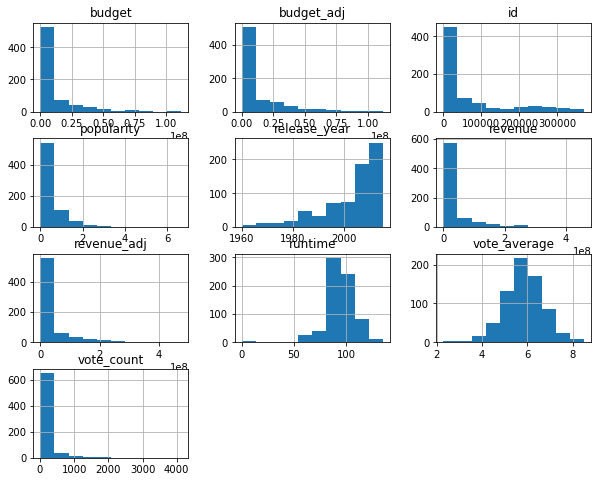

In [12]:
comedy.hist(figsize=(10,8));

Budget and popularity are skewed to the left - most comedy movies that are filmed are not very popular and have low budget. Release year is skewed to the right - most comedy movies were released after year 2000.
Majority of comedie movies have runtime between 80 - 90 minutes.

In [13]:
comedy[comedy.production_companies.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
434,309924,tt3717016,0.232354,0,161820,After the Ball,Portia Doubleday|Marc-AndrÃ© Grondin|Chris Not...,http://www.aftertheballmovie.com/,Sean Garrity,Fairytales are always in fashion,...,"After the Ball, a retail fairy tale set in the...",101,Comedy,NaN,2/27/15,28,6.3,2015,0.0,148874.334495
576,326665,tt4530184,0.081820,0,0,Aziz Ansari: Live at Madison Square Garden,Aziz Ansari,http://www.netflix.com/WiMovie/80038296,Aziz Ansari,NaN,...,Ansari headlines the iconic Madison Square Gar...,58,Comedy,NaN,3/6/15,35,7.1,2015,0.0,0.000000
914,253310,tt2182256,0.465438,0,0,Premature,John Karna|Katie Findlay|Craig Roberts|Alan Tu...,NaN,Dan Beers,NaN,...,"On the most important day of his young life, a...",93,Comedy,NaN,7/2/14,67,5.1,2014,0.0,0.000000
1055,305932,tt4189442,0.269274,0,0,Expelled,Lia Marie Johnson|Andrea Russett|Marcus Johns|...,http://www.expelledmovie.com/,Alex Goyette,Eastwood High Is About To Get Schooled,...,Felix (Cameron Dallas) is a legendary prankste...,85,Comedy,NaN,12/12/14,118,6.3,2014,0.0,0.000000
1103,272160,tt2166934,0.212083,0,0,My Man is a Loser,Tika Sumpter|John Stamos|Michael Rapaport|Brya...,NaN,Mike Young,NaN,...,"When it comes to women, playboy Mike has all t...",95,Comedy,NaN,7/25/14,14,4.9,2014,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,5651,tt0075376,0.381737,0,0,Up!,Edward Schaaf|Raven De La Croix|Monty Bane|Rob...,NaN,Russ Meyer,If you don't see Up! â€¦ you'll feel down!,...,Up! is a 1976 soft core sex comedy film direct...,80,Comedy,NaN,10/1/76,10,4.9,1976,0.0,0.000000
10397,25117,tt0152183,0.012941,0,0,Bill Hicks: Revelations,Bill Hicks,NaN,Chris Bould,NaN,...,Since his untimely death from pancreatic cance...,60,Comedy,NaN,5/27/93,11,7.8,1993,0.0,0.000000
10520,12278,tt0091991,0.464307,0,0,Soul Man,C. Thomas Howell|Rae Dawn Chong|Arye Gross|Jam...,NaN,Steve Miner,A comedy with heart and soul,...,Soul Man is a comedy film made in 1986 about a...,104,Comedy,NaN,10/24/86,15,5.4,1986,0.0,0.000000
10592,38343,tt0092276,0.001567,0,0,Yuppies 2,Massimo Boldi|Jerry CalÃ |Christian De Sica|Ez...,NaN,Enrico Oldoini,NaN,...,Continuano le avventure degli yuppies milanesi...,104,Comedy,NaN,1/1/86,11,5.0,1986,0.0,0.000000


95 rows in comedy out of 712, have missing information about production companies. I will drop that rows and loose some data, but the remaining data will be accurate. A lot of movies with zero revenue do not have production company filled out. 

### Data Cleaning

#### 1. Dropping columns that I will not need in my analysis

In [14]:
comedy.drop(["id","homepage","tagline","keywords","vote_count","vote_average","budget_adj","revenue_adj"], axis=1, inplace=True)

In [15]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 26 to 10860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               711 non-null    object 
 1   popularity            712 non-null    float64
 2   budget                712 non-null    int64  
 3   revenue               712 non-null    int64  
 4   original_title        712 non-null    object 
 5   cast                  712 non-null    object 
 6   director              707 non-null    object 
 7   overview              711 non-null    object 
 8   runtime               712 non-null    int64  
 9   genres                712 non-null    object 
 10  production_companies  617 non-null    object 
 11  release_date          712 non-null    object 
 12  release_year          712 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 77.9+ KB


In [16]:
comedy.dropna(inplace=True)
rows, col = comedy.shape
print('There are {} rows and {} columns in comedy genre after dropping NaN values.'.format(rows, col))

There are 615 rows and 13 columns in comedy genre after dropping NaN values.


#### 2. Converting release_dates columns to datetime object

In [17]:
comedy['release_date'] = pd.to_datetime(comedy['release_date'])

In [18]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 26 to 10860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               615 non-null    object        
 1   popularity            615 non-null    float64       
 2   budget                615 non-null    int64         
 3   revenue               615 non-null    int64         
 4   original_title        615 non-null    object        
 5   cast                  615 non-null    object        
 6   director              615 non-null    object        
 7   overview              615 non-null    object        
 8   runtime               615 non-null    int64         
 9   genres                615 non-null    object        
 10  production_companies  615 non-null    object        
 11  release_date          615 non-null    datetime64[ns]
 12  release_year          615 non-null    int64         
dtypes: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### 1. What are profit trends for Comedy movies in 1960 - 2015?

In [19]:
# First we need to insert a column for the profit/loss value of each comedie
comedy.insert(3, 'profit_loss', comedy['revenue'] - comedy['budget'])

In [20]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 26 to 10860
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               615 non-null    object        
 1   popularity            615 non-null    float64       
 2   budget                615 non-null    int64         
 3   profit_loss           615 non-null    int64         
 4   revenue               615 non-null    int64         
 5   original_title        615 non-null    object        
 6   cast                  615 non-null    object        
 7   director              615 non-null    object        
 8   overview              615 non-null    object        
 9   runtime               615 non-null    int64         
 10  genres                615 non-null    object        
 11  production_companies  615 non-null    object        
 12  release_date          615 non-null    datetime64[ns]
 13  release_year     

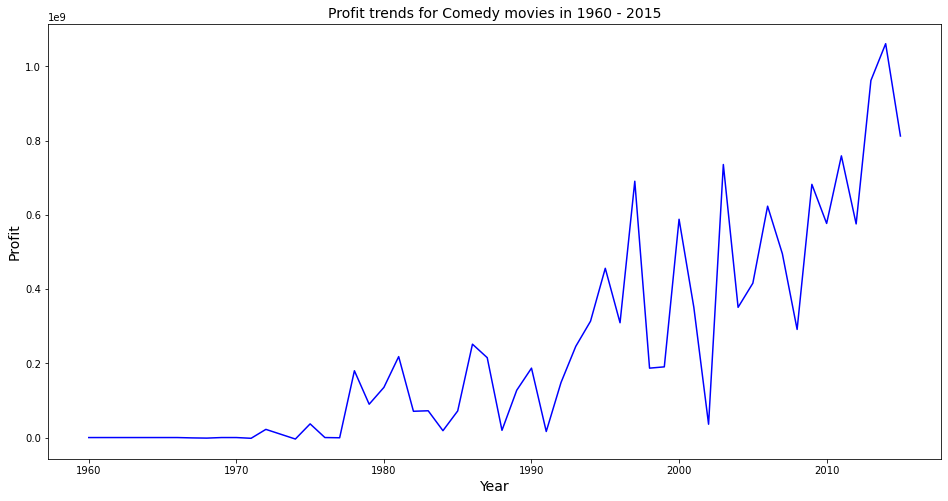

In [21]:
comedy.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Profit trends for Comedy movies in 1960 - 2015', fontsize = 14 )
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Profit', fontsize = 14);

### 2. What is average Runtime of Comedy Movies in 1960 -2015

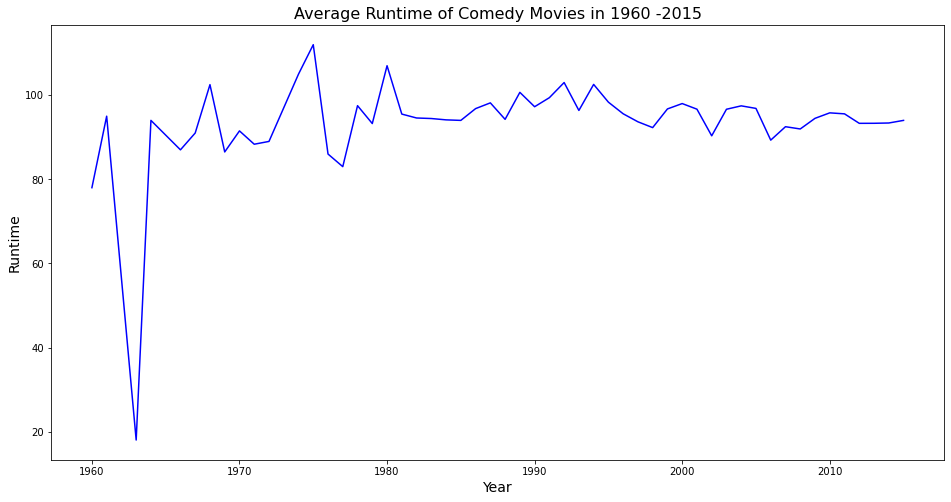

In [22]:
comedy.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'b')
plt.title('Average Runtime of Comedy Movies in 1960 -2015', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Runtime', fontsize = 14);

### 3. Top 10 Comedies that made most money and production companies that filmed them

I have choosen a treshold number for  profit at $50,000,000.

In [23]:
#I will inspect following columns
col = ['original_title', 'production_companies', 'director', 'budget', 'revenue', 'profit_loss']

comedy.query('profit_loss>50000000')[col].sort_values('budget', ascending = False).head(10)

,original_title,production_companies,director,budget,revenue,profit_loss
1978,Gulliver's Travels,Twentieth Century Fox Film Corporation|Dune En...,Rob Letterman,112000000,237382724,125382724
5482,The Hangover Part III,Legendary Pictures|Green Hat Films,Todd Phillips,103000000,362000072,259000072
6280,Fun with Dick and Jane,Imagine Entertainment|Columbia Pictures Corpor...,Dean Parisot,100000000,202026112,102026112
5481,Grown Ups 2,Columbia Pictures|Happy Madison Productions|So...,Dennis Dugan,80000000,246984278,166984278
1954,Grown Ups,Columbia Pictures|Happy Madison Productions|Re...,Dennis Dugan,80000000,271430189,191430189
3395,The Hangover Part II,Legendary Pictures|Living Films|Green Hat Film...,Todd Phillips,80000000,254455986,174455986
3447,Jack and Jill,Columbia Pictures|Happy Madison Productions|Br...,Dennis Dugan,79000000,149673788,70673788
4985,Anger Management,Columbia Pictures|Revolution Studios|Happy Mad...,Peter Segal,75000000,195745823,120745823
6629,Talladega Nights: The Ballad of Ricky Bobby,Columbia Pictures|Apatow Productions,Adam McKay,72500000,162966177,90466177
26,Ted 2,Universal Pictures|Media Rights Capital|Fuzzy ...,Seth MacFarlane,68000000,215863606,147863606


### 4. Find 10 least earning Comedies and production companies that filmed them

In [24]:
comedy.query('profit_loss>50000000')[col].sort_values('budget', ascending = True).head(10)

,original_title,production_companies,director,budget,revenue,profit_loss
7850,The Jerk,Universal Pictures|Aspen Film Society,Carl Reiner,0,73961419,73961419
10502,Ruthless People,Touchstone Pictures,Jim Abrahams|David Zucker|Jerry Zucker,0,71624879,71624879
10289,Dave,Donner/Shuler-Donner Productions|Warner Bros.|...,Ivan Reitman,0,63000000,63000000
9673,Eddie Murphy Raw,Paramount Pictures,Robert Townsend,0,50504655,50504655
8551,The Birdcage,Metro-Goldwyn-Mayer (MGM),Mike Nichols,0,185260553,185260553
4476,The Campaign,Everyman Pictures|Gary Sanchez Productions|War...,Jay Roach,0,104907746,104907746
8162,Something to Talk About,Spring Creek Productions|Warner Bros.|Hawn / S...,Lasse HallstrÃ¶m,0,50892160,50892160
8153,Nine Months,Twentieth Century Fox Film Corporation|1492 Pi...,Chris Columbus,0,69660733,69660733
8122,Father of the Bride Part II,Sandollar Productions|Touchstone Pictures,Charles Shyer,0,76578911,76578911
3442,The Inbetweeners Movie,Channel 4 Television Corporation,Ben Palmer,0,88025781,88025781


### 5. Which variables affect popularity of Comedy movies?

In [25]:
# Use corr to compute correlation between columns
comedy.corr()

,popularity,budget,profit_loss,revenue,runtime,release_year
popularity,1.000000,0.511956,0.618909,0.672655,0.229703,0.163911
budget,0.511956,1.000000,0.413029,0.649135,0.271653,0.183753
profit_loss,0.618909,0.413029,1.000000,0.960870,0.157933,0.037717
revenue,0.672655,0.649135,0.960870,1.000000,0.214537,0.087392
runtime,0.229703,0.271653,0.157933,0.214537,1.000000,-0.006903
release_year,0.163911,0.183753,0.037717,0.087392,-0.006903,1.000000


When I look at popularity, I see stronger correlation between budget, profit_loss and revenue.

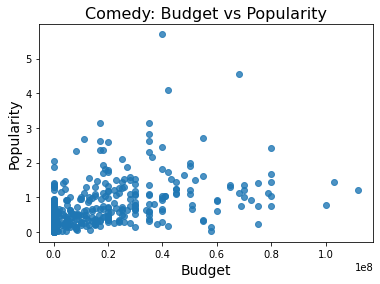

In [26]:
sns.regplot(x = comedy['budget'], y = comedy['popularity'], fit_reg = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size
plt.title('Comedy: Budget vs Popularity', fontsize = 16)
plt.xlabel('Budget', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);

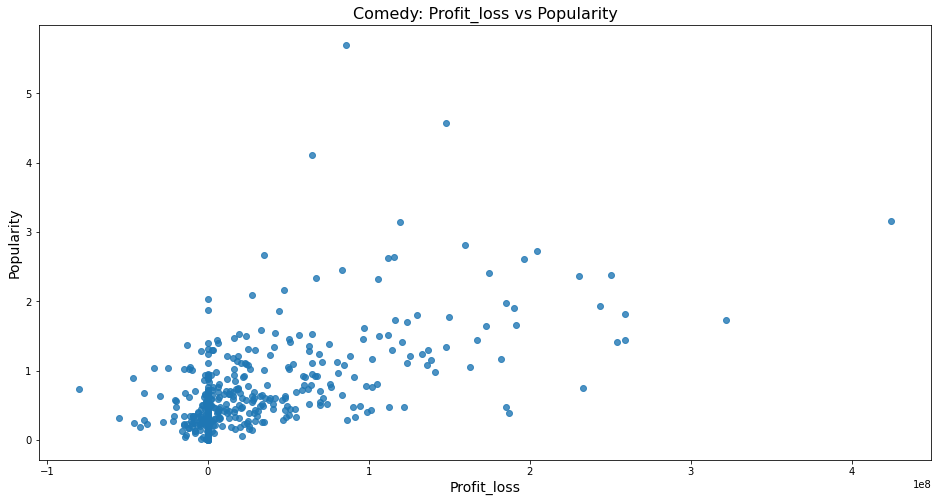

In [27]:

sns.regplot(x = comedy['profit_loss'], y = comedy['popularity'], fit_reg = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size
plt.title('Comedy: Profit_loss vs Popularity', fontsize = 16)
plt.xlabel('Profit_loss', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);

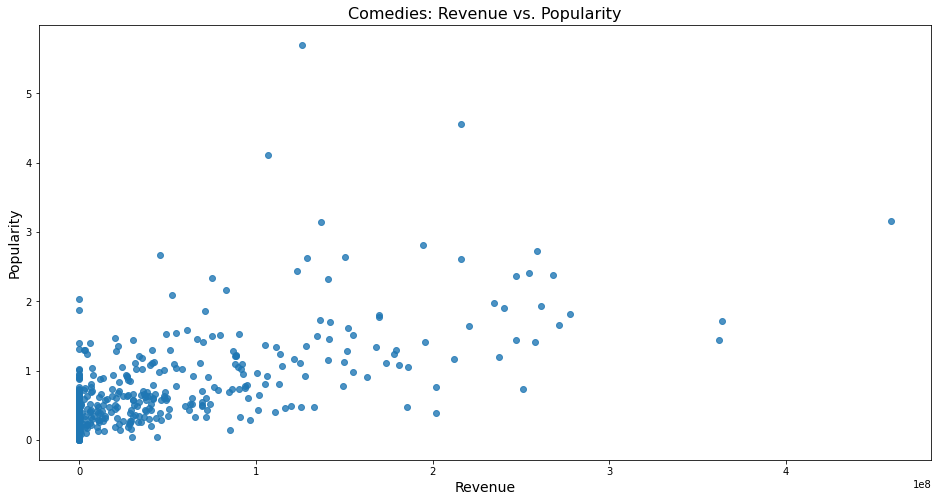

In [28]:
sns.regplot(x = comedy['revenue'], y = comedy['popularity'], fit_reg = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size
plt.title('Comedies: Revenue vs. Popularity', fontsize = 16)
plt.xlabel('Revenue', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);

<a id='conclusions'></a>
## Conclusions

- Comedies movies show a rising trend of making more profit.
- There was interesting suprise on average runtime graph - there was a huge decline for a short time after 1960 - comedies were only 20 minutes long. Latest trend shows that comedies are aroung 95 minutes long.
- Columbia pictures production company was 5 times among production companies that were filming top 10 earning comedie films. If movie company choose to contract them it could help increase possibility that comedy would be more successful. Similar conclusion cannot be made for 10 least profitable movies.
- Comedies with largest budget are not necessarily most popular.
- Comedies with largest profit are not necessarily most popular.
- comedies that made most profit are not necessary most popular.

## Limitations
- Rows with NaN values were dropped and data from other columns was not analysed in this analysis
- budget and revenue columns do not have specified currencies. It is not clearly stated if all data was converted into same currency before summed up into final number.
- Top 10 profitable comedies were filmed by different production companies, so it cannot be said which combination is perfect recipe to film a Comedy that would be in top 10 best earning Comedie films. 
- There are several factors that we did not include in our analysis why are some comedies more popular; for example director, cast, etc. If we wanted to make more definite conclusion, which factors need to be meet to film next comedy that will be in Top 10 most profitable list, we should expand our analysis and also consider these factors.